# Finance Data Project ( GOOGLE)



# Methods for stock price forcasting 
___
    1. Fundamental Analysis
    2. Technical Analysis
    3. Time Series Forecasting
  ___

### 1. Fundamental Analysis 
share value of a company is estimated by analyzing:
* sales
* earnings
* profits 
* other economic factors

This method is most suited for long term forecasting
___


### 2. Technical Analysis
* uses the historical price of stocks for identifying the future price.
        - Moving average (most common algorithm)
 
 This method is suitable for short term predictions.
 ___

###  3. Time Series Forecasting

This involves 2 types of algorithms
* Linear Models (AR, ARMA, ARIMA) 
* Non Linear Models (Deep learning algorithms)
     -  inter dependency between **stock price** and **stock volume**
     
**Deep learning Algorithms :** 

- Multi layer perceptrons (MLP)
- Recursive Neural Networks (RNN)
- CNN(Convolutional Neural Network)
- **Long Short Term Memory (LSTM)**

___



### Trading 
- Algoritmic Trading  (use minute wise data of the stock)

In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
import matplotlib , numpy, seaborn
print('matplotlib' , ' version' ,'\t', matplotlib.__version__)
print('numpy  ' , ' version' ,'\t', numpy.__version__)
print('Seaborn' , ' version','\t' , seaborn.__version__)

matplotlib  version 	 3.4.3
numpy    version 	 1.16.5
Seaborn  version 	 0.9.0


In [3]:
# !pip install yfinance --upgrade --no-cache-dir
# !pip install pandas_datareader

In [4]:
# set style
sns.set(style='ticks', palette='bright')

## Stock Data for Google from 2010-2021 
* GOOG



In [95]:
from pandas_datareader import data as pdr
import yfinance as yf

tickers = ['GOOG']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,8,27)
df = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [96]:
df=pd.DataFrame(df['Close'])
df.head()

,Close
Date,
2011-01-03,301.046600
2011-01-04,299.935760
2011-01-05,303.397797
2011-01-06,305.604523
2011-01-07,307.069031


Text(0, 0.5, 'Google Stock Price (USD)')

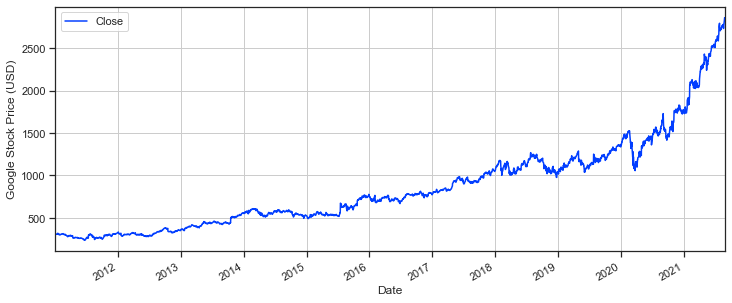

In [97]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
df.plot(kind='line', ax=ax)
ax.grid('on')
ax.set_ylabel('Google Stock Price (USD)')

# Moving averages 


In [98]:
#Simple  Moving Average, SMA 
win=30
SMA=df.rolling(window=win).mean() 

In [99]:
#Weighted Moving Average (WMA)
weights = np.arange(1,win+1) #this creates an array with integers 1 to 'win' included
WMA=df.rolling(window=win).apply(lambda prices:np.dot(prices, weights)/weights.sum())

C:\Users\Yasser B\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


#### Exponential Moving Average (EMA)
___

$$EMA_t = \alpha Price_t + (1- \alpha) EMA_{t-1} $$

$$ \alpha = \frac{2}{n+1} $$ 
n=30 
$$ \alpha =\frac{2}{30+1} = 0.06451 $$

In [100]:
EMA=df.ewm(span=win).mean()


#### Visualizing the calculated averages

(14975.0, 18900.0)

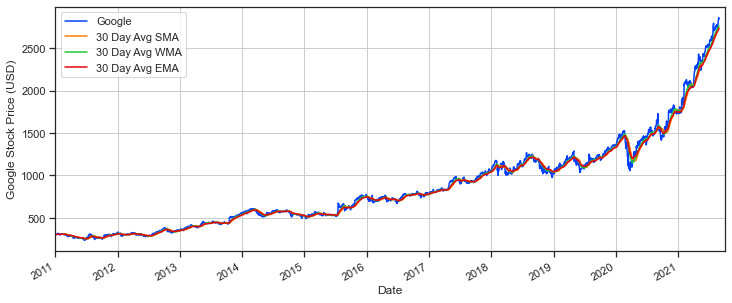

In [101]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
# Google close value
df.plot(kind='line', ax=ax)

# Simple Moving Average 
SMA.plot(kind='line', ax=ax) 

 #  Weighted Moving Average (WMA)
WMA.plot(kind='line', ax=ax)

# Exponential Moving Average (EMA)
EMA.plot(kind='line', ax=ax)

ax.set_ylabel('Google Stock Price (USD)')
ax.legend(['Google',  str(win)+' Day Avg SMA',  str(win)+' Day Avg WMA', str(win)+' Day Avg EMA'])
ax.grid('on')
ax.set_xlim([datetime.date(2011,1,1), datetime.date(2021,9,30)])

### Financial Statistics 
Returns for each stock. 
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [102]:
# Daily Returns
returns=df.pct_change()

In [103]:
returns.head()

,Close
Date,
2011-01-03,NaN
2011-01-04,-0.003690
2011-01-05,0.011543
2011-01-06,0.007273
2011-01-07,0.004792


In [104]:
returns.dropna(inplace=True)

In [105]:
#  Minimum and Maximum daily returns
print('The minimum return for Google is {:.2f} % on {}'.format(100*returns.min()[0], returns.idxmin()[0].date()))
print('The maximum return for Google is {:.2f} % on {}'.format(100*returns.max()[0], returns.idxmax()[0].date()))

The minimum return for Google is -11.10 % on 2020-03-16
The maximum return for Google is 16.05 % on 2015-07-17


In [106]:
# Standard Deviation (Volatility)
print('Risk of Google stock is {:0.2f} %'.format(100*returns.std()[0]))

Risk of Google stock is 1.62 %


#### Gussian Distribution fit to daily returns

<AxesSubplot:>

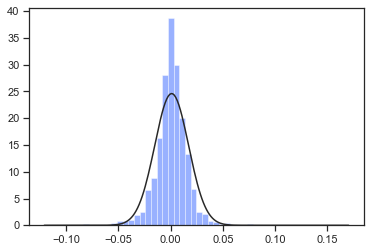

In [107]:
from scipy.stats import norm
sns.distplot(returns,kde=False, fit=norm)

In [108]:
print('std: {:.4f} mean: {:.4f}'.format(returns.std()[0], returns.mean()[0]))


std: 0.0162 mean: 0.0010


No handles with labels found to put in legend.


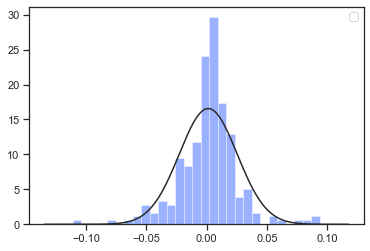

In [109]:
sns.distplot(returns[returns.index.year==2020],kde=False,  fit=norm)
plt.legend()

Text(0, 0.5, 'Daily Return')

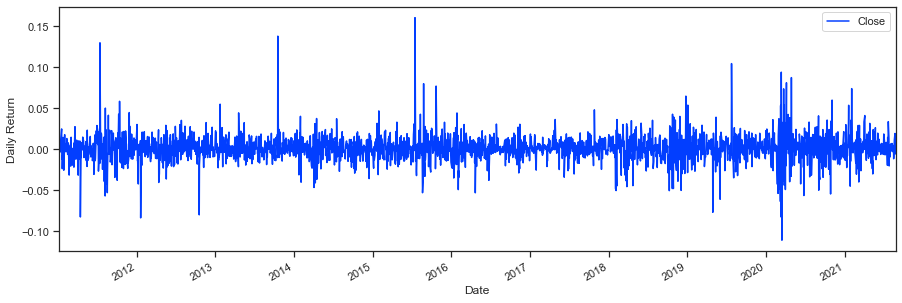

In [110]:
returns.plot.line(figsize=(15,5))
plt.ylabel('Daily Return')

### Fraction of data for Machine learning 

In [111]:
df1=df.reset_index()['Close']

In [112]:
df1

0        301.046600
1        299.935760
2        303.397797
3        305.604523
4        307.069031
           ...     
2676    2768.739990
2677    2821.989990
2678    2847.969971
2679    2859.000000
2680    2842.459961
Name: Close, Length: 2681, dtype: float64

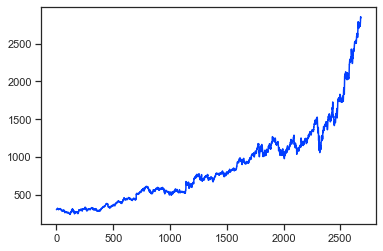

In [113]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Train and Test  data  
### Data transformation: Normalization 

In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [115]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [116]:
training_size,test_size

(2412, 269)

In [117]:
train_data.shape , test_data.shape


((2412, 1), (269, 1))

In [118]:
train=pd.DataFrame(df.iloc[0:training_size])
test= pd.DataFrame(df.iloc[training_size:len(df1)])

In [119]:
test.size

269

### Time Series Generator 

In [120]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [121]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)



In [122]:
X_train.shape, y_train.shape

((2311, 100), (2311,))

In [123]:
X_test.shape, y_test.shape

((168, 100), (168,))

In [124]:
X_test[1][-1], y_test[0]

(0.5728607016041413, 0.5728607016041413)

In [125]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [126]:
X_train.shape , y_train.shape

((2311, 100, 1), (2311,))

In [127]:
X_test.shape , y_test.shape

((168, 100, 1), (168,))

# Creating LSTM Model 

In [128]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [129]:
n_features = 1

In [130]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_test.shape[1], n_features), return_sequences=True))
# model.add(Dropout(rate=0.5))
model.add(LSTM(64, input_shape=(X_test.shape[1], n_features), return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

In [131]:
# length

In [132]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,batch_size=64,verbose=1)

Train on 2311 samples, validate on 168 samples
Epoch 1/12
2311/2311 [==============================] - 12s 5ms/sample - loss: 0.0070 - val_loss: 0.0018
Epoch 2/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.6041e-04 - val_loss: 0.0031
Epoch 3/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.4553e-04 - val_loss: 0.0024
Epoch 4/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.3688e-04 - val_loss: 0.0028
Epoch 5/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.3268e-04 - val_loss: 0.0024
Epoch 6/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.2672e-04 - val_loss: 0.0019
Epoch 7/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.4164e-04 - val_loss: 0.0021
Epoch 8/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.3056e-04 - val_loss: 0.0030
Epoch 9/12
2311/2311 [==============================] - 8s 3ms/sample - loss: 1.1745e-04 - v

In [134]:
losses=pd.DataFrame(model.history.history)


<AxesSubplot:>

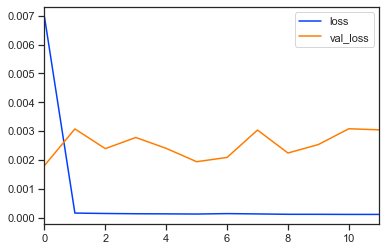

In [135]:
losses.plot()

### We will put this logic in a for loop

In [136]:
test_predict=model.predict(X_test)


In [137]:
test_predict.shape

(168, 1)

In [138]:
true_prediction=scaler.inverse_transform(test_predict)

In [139]:
true_prediction.shape

(168, 1)

In [140]:
test.shape

(269, 1)

In [149]:
test_compare=test.iloc[-168:]

In [150]:
test_compare['True_pred']=true_prediction

C:\Users\Yasser B\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

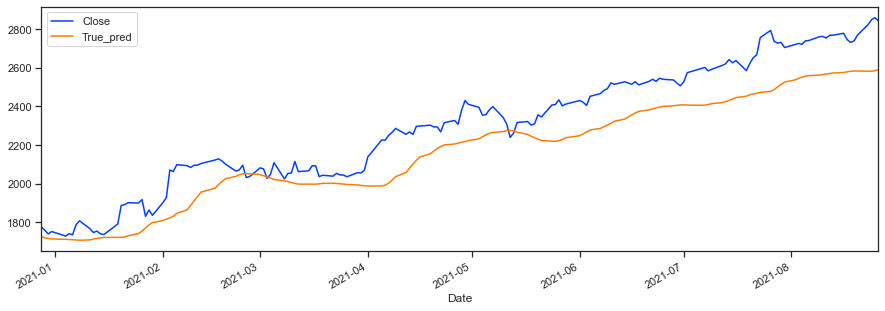

In [151]:
test_compare.plot.line(figsize=(15,5))

In [152]:
X_test.shape

(168, 100, 1)

In [156]:
first_batch=X_test[-1].reshape(1,100,1)


In [157]:
first_batch_pred= model.predict(first_batch)

In [158]:
first_batch_pred[0][0]

0.89726347

In [159]:
scaler.inverse_transform(first_batch_pred)

array([[2589.5789]], dtype=float32)

In [160]:
test_predictions=[]
first_eval_batch=X_test[-1:]
current_batch=first_eval_batch.reshape((1,time_step, n_features))
for i in range (30):
        current_pred= model.predict(current_batch)[0][0]
        test_predictions.append(current_pred)
        current_batch=np.append(current_batch[:,1:,:], [[[current_pred]]], axis=1)


In [161]:
test_predictions=np.array(test_predictions).reshape(30,1)

In [162]:
true_pred = scaler.inverse_transform(test_predictions)

In [163]:
forcast=pd.DataFrame(true_pred)

In [164]:
days = pd.date_range(start='2021-08-27', end='2021-09-25')

In [165]:
forcast['Date']=days

In [166]:
forcast.set_index('Date', inplace=True)

In [167]:
forcast.rename({0: 'Forcast'}, axis=1, inplace=True)

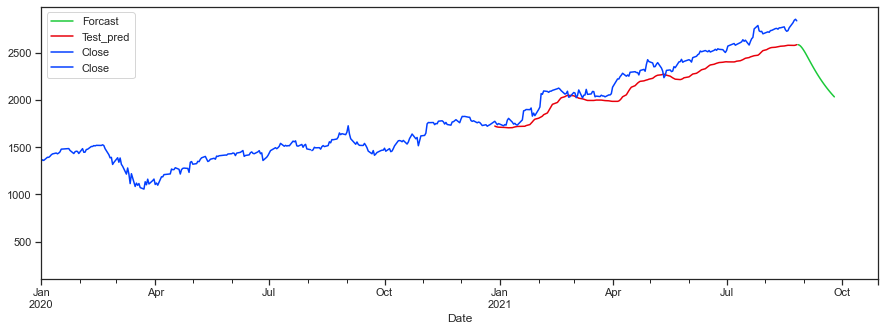

In [168]:
ax=plt.gca()
forcast.plot(ax=ax, color='g')
test_compare['True_pred'].plot.line(figsize=(15,5), ax=ax, color='r', label='Test_pred')
train.plot.line(ax=ax, color='b')
test.plot.line(ax=ax, color='b')
ax.set_xlim([datetime.date(2020,1,1), datetime.date(2021,10,30)])
ax.legend()

In [169]:
test_compare.head()

,Close,True_pred
Date,,
2020-12-28,1776.089966,1725.478027
2020-12-29,1758.719971,1719.339844
2020-12-30,1739.520020,1715.875244
2020-12-31,1751.880005,1713.688965
2021-01-04,1728.239990,1711.748169
